# Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
#Importing required libraries
import pathlib
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D


In [2]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
#count the number of images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
#initialize few main variables which can be used across the models
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,
                                                               image_size=(180,180), seed=123, subset="training",batch_size=batch_size,label_mode='categorical')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,validation_split=0.2,
                                                               image_size=(180,180), seed=123, subset="validation",batch_size=batch_size,label_mode='categorical')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

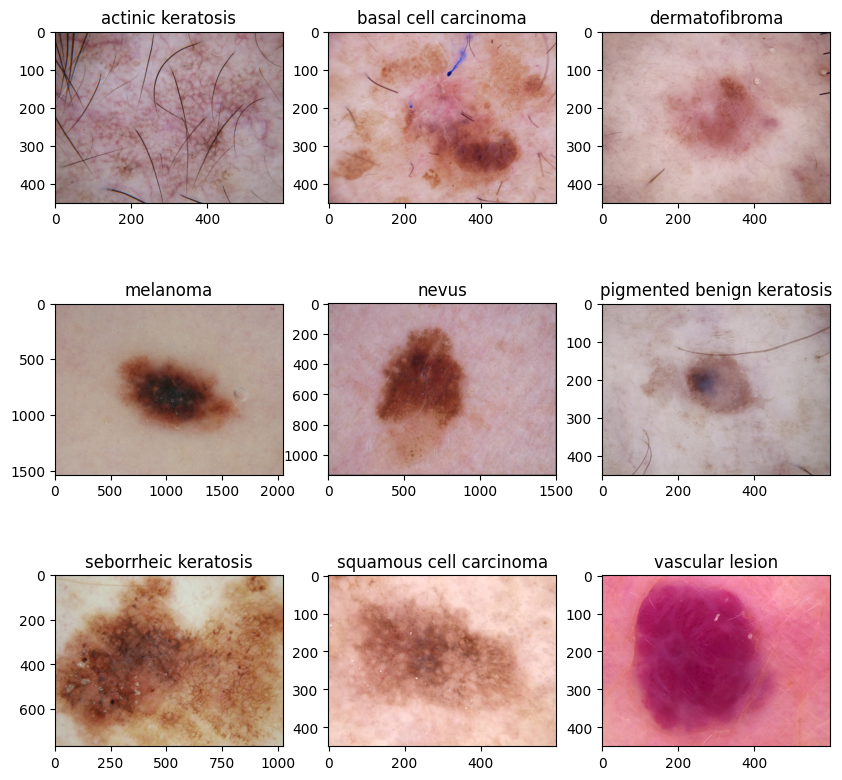

In [9]:
#lets plot the images of differnet classes for better understanding
#define the figure size
plt.figure(figsize=(10,10))
#loop 9 times as 9 different classes
for i in range(9): 
  #plot 9 sub plots
  plt.subplot(3, 3, i + 1)
  #read the image from the train dataset
  img = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  #print the title
  plt.title(class_names[i])
  #plot the images
  plt.imshow(img)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 1: CNN Model
Create the model 
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
## Your code goes here
# lets define CNN Model 
from tensorflow.keras import layers
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [18]:
### Todo, choose an appropirate optimiser and loss function
#lets use adam optimizer and categorical_crossentropy loss. This parameters helps in multi class classifications
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_ds = train_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))


In [19]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 178, 178, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 87, 87, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [20]:
#lets train the model 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
#define the early stop
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

epochs = 20
#Fit the model  with 20 epochs
history = model.fit(train_ds, validation_data=val_ds,
  epochs=epochs,callbacks=[earlystop]
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 916ms/step - accuracy: 0.1958 - loss: 2.2719 - val_accuracy: 0.2796 - val_loss: 1.9748
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.3538 - loss: 1.7828 - val_accuracy: 0.4161 - val_loss: 1.6145
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 53s 955ms/step - accuracy: 0.4433 - loss: 1.5753 - val_accuracy: 0.4922 - val_loss: 1.5105
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 48s 854ms/step - accuracy: 0.5008 - loss: 1.4424 - val_accuracy: 0.5213 - val_loss: 1.4214
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 879ms/step - accuracy: 0.5069 - loss: 1.4422 - val_accuracy: 0.5123 - val_loss: 1.4502
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 936ms/step - accuracy: 0.5525 - loss: 1.2839 - val_accuracy: 0.5213 - val_loss: 1.4020
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 56s 995ms/step - accuracy: 0.5370 - loss: 1.3352 - val_accuracy: 0.5101 - val_loss: 1.4244
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 928ms/step - accuracy: 0.5655 - loss: 1.2678 - val_accurac

### Visualizing training results

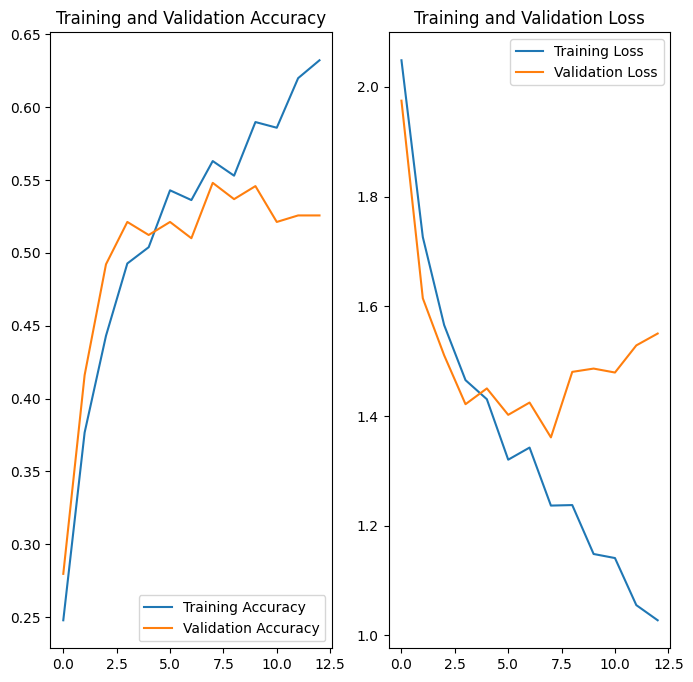

In [21]:
#lets visualize the results in a graphical view
#read the accuracy of train and validation dataset
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#read the loss of train and validation dataset
loss = history.history['loss']
val_loss = history.history['val_loss']
#since the earlystop is at 13, lets use the epoch range as 13
epochs_range = range(13)
#plot the accurancy and loss in sub plots
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## Observations
1. Observed that model has performed average on training dataset as the accuracy score reaches above 0.62.
2. Model has not performed well on unseen/validation dataset as the accuracy score is 0.52
3. higher validation loss and lower validation accuracy states that, model has overfitted and not performed well on unseen data

## Model 2: CNN with Data Augumentation

In [22]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

from skimage.transform import rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#ImageDataGenerator will helps on augumentation properly. Like reshaping, normalization, rotations etc.,
datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,)

In [23]:
#lets call and perform the data augmentation on train and validation ds
train_ds_gen = train_ds.map(lambda x, y: (datagen.standardize(x), y))
val_ds_gen = val_ds.map(lambda x, y: (datagen.standardize(x), y))

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


### Todo:
### Create the model, compile and train the model


In [25]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
#lets define a CNN model
from tensorflow.keras import layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(180,180,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the model

In [26]:
## Your code goes here
#lets use adam optimizer and categorical_crossentropy loss. This parameters helps in multi class classifications
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
#use earlystop option to stop the learning
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

epochs = 20
## Your code goes here, use 20 epochs.
history = model.fit(train_ds, validation_data=val_ds,
  epochs=epochs,callbacks=[earlystop]
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.1992 - loss: 2.1825 - val_accuracy: 0.3669 - val_loss: 1.7993
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 53s 940ms/step - accuracy: 0.3340 - loss: 1.8172 - val_accuracy: 0.4474 - val_loss: 1.5716
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 989ms/step - accuracy: 0.4436 - loss: 1.5761 - val_accuracy: 0.5145 - val_loss: 1.4616
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4797 - loss: 1.4438 - val_accuracy: 0.5145 - val_loss: 1.4192
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5439 - loss: 1.2876 - val_accuracy: 0.5056 - val_loss: 1.4041
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5457 - loss: 1.3020 - val_accuracy: 0.5347 - val_loss: 1.4419
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 927ms/step - accuracy: 0.5522 - loss: 1.2889 - val_accuracy: 0.5235 - val_loss: 1.4553
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 925ms/step - accuracy: 0.5747 - loss: 1.1733 - val_accuracy: 0.5324

### Visualizing the results

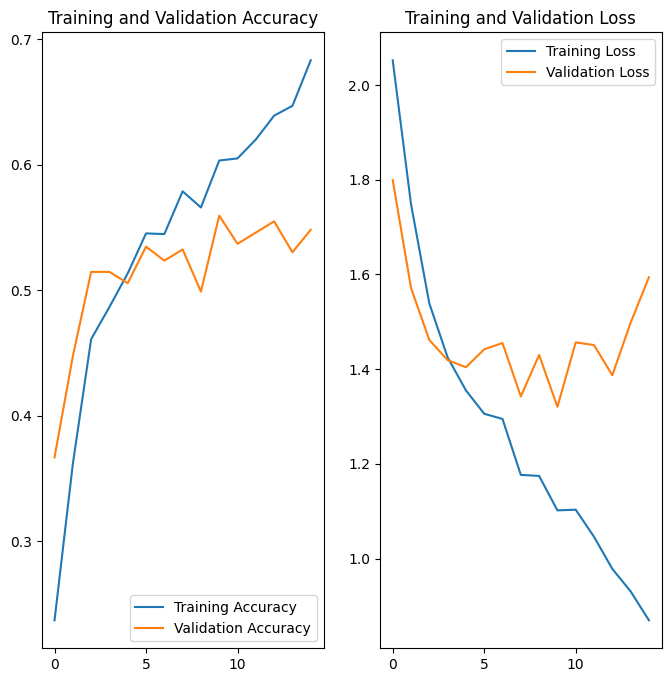

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations
1. CNN model with augmentation has performed same as model 1. Still the overfit problem exists

## Model 3: CNN with Class Imbalance

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [30]:
## Your code goes here.
#define the lists to capture the classes and images count
classnames = []
countimage = []
#loop the train directories
for childdirectories in pathlib.Path(data_dir_train).iterdir():
    if childdirectories.is_dir():
        count = sum(1 for file in childdirectories.iterdir() if file.is_file())
        classnames.append(childdirectories.name)
        #append the images to countimage variables
        countimage.append(count)

#create and copy the data in to dataframe
class_dist_df =  pd.DataFrame({'Different Classes': classnames, 'ImagesCount': countimage})

class_dist_df

,Different Classes,ImagesCount
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


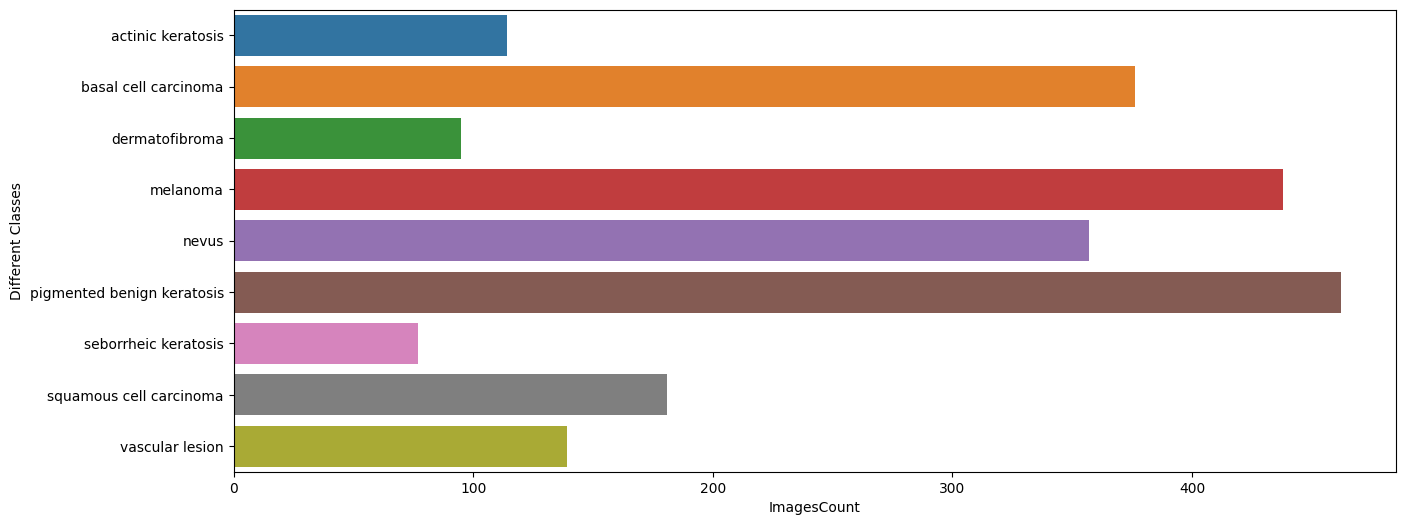

In [31]:
#plot the cancer classes in to barplot visualizations


plt.figure(figsize=(15, 6))
sns.barplot(y=class_dist_df['Different Classes'],x=class_dist_df['ImagesCount'],data=class_dist_df)
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
seborrheic keratosis has least data which has 77 records total
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis has dominated all the data

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [72]:
#!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21EA350D590>: 100%|████████████| 500/500 [00:09<00:00, 54.93 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21EA4730AD0>: 100%|████████████| 500/500 [00:09<00:00, 55.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21EA34CDA10>: 100%|████████████| 500/500 [00:09<00:00, 55.54 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21EA34F3E50>: 100%|███████████| 500/500 [00:46<00:00, 10.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21EA34FEDD0>: 100%|███████████| 500/500 [00:46<00:00, 10.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21EA46C55D0>: 100%|████████████| 500/500 [00:09<00:00, 55.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21EA350D590>: 100%|███████████| 500/500 [00:19<00:00, 25.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x21EA46DEB50>: 100%|█| 500/500 [00:08<00:00, 56.74 Sam


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x21EA35AD290>: 100%|█| 500/500 [00:08<00:00, 56.25 Sam


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [51]:
data_dir_train_aug = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train")
image_count_train = len(list(data_dir_train_aug.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [52]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train_aug, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration Aug\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9845cad2-7aa3-43aa-b90d-c134ea824067.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration Aug\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_1f98a0c3-f1e2-46ce-9333-dc2b5b604566.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration Aug\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_748e1fe8-c093-4b09-bebe-fd05a2ebf855.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration Aug\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_8de4d087-6c53-4a88-a144-efa88ef050d4.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration Aug\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_92e6bec8-33b8-4ee5-8f4c-ed793d486c4a.jpg',
 'Skin cancer ISIC The International Skin Imaging 

In [55]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train_aug, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [54]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
#data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train_aug = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration Aug/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,label_mode='categorical',
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,label_mode='categorical',
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [40]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [41]:
train_ds = train_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))
val_ds = val_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from tensorflow.keras import layers
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 input_shape=(180,180,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128))

model.add(Activation('relu'))
model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 178, 178, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 87, 87, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [45]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, validation_data=val_ds,
  epochs=epochs,callbacks=[earlystop]
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 168s 853ms/step - accuracy: 0.1691 - loss: 2.2134 - val_accuracy: 0.3207 - val_loss: 1.7612
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 125s 740ms/step - accuracy: 0.3458 - loss: 1.7135 - val_accuracy: 0.4321 - val_loss: 1.4703
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 124s 735ms/step - accuracy: 0.4315 - loss: 1.4872 - val_accuracy: 0.4774 - val_loss: 1.3762
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 127s 751ms/step - accuracy: 0.4668 - loss: 1.4142 - val_accuracy: 0.4736 - val_loss: 1.3855
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 125s 741ms/step - accuracy: 0.5099 - loss: 1.2879 - val_accuracy: 0.5479 - val_loss: 1.1929
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 124s 735ms/step - accuracy: 0.5414 - loss: 1.1938 - val_accuracy: 0.5947 - val_loss: 1.0928
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 124s 731ms/step - accuracy: 0.5868 - loss: 1.1275 - val_accuracy: 0.6340 - val_loss: 1.0272
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 124s 731ms/step - accuracy: 0.6016 -

#### **Todo:**  Visualize the model results

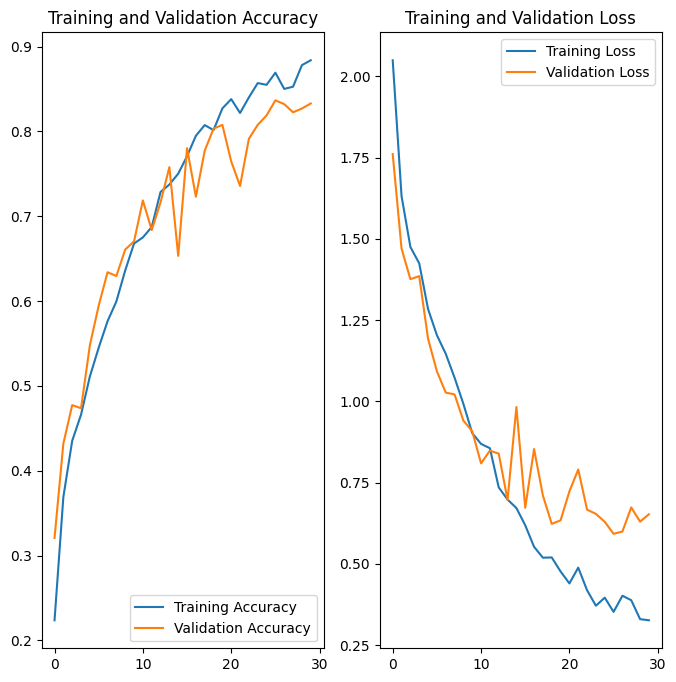

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Observations: 
1. Class rebalance plays a key role in the results. 
2. CNN with Class rebalance achieves a good accuracy score among train and validation sets. 
3. Training score reaches to 88 and validation score reaches to 83 which proves that, no overfitting exits. 


## Perform in Test Data

In [64]:
path_to_testing_dataset="Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_testing_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21EA3959650>: 100%|███████████| 500/500 [00:05<00:00, 89.79 Samples/s]


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21E9EE33690>: 100%|████████████| 500/500 [00:05<00:00, 85.80 Samples/s]


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1936x1936 at 0x21EA38DF490>: 100%|█| 500/500 [03:19<00:00,  2.50 S


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x21EA475DF50>: 100%|██████████| 500/500 [00:24<00:00, 20.17 Samples/s]


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1022x767 at 0x21EA3ECFE10>: 100%|███████████| 500/500 [00:15<00:00, 32.42 Samples/s]


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x21EA2930D50>: 100%|█| 500/500 [00:06<00:00, 79.11 Sam


Initialised with 3 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21EA34A4410>: 100%|███████████| 500/500 [00:14<00:00, 35.02 Samples/s]


Initialised with 16 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21EA47E9090>: 100%|████████████| 500/500 [02:41<00:00,  3.10 Samples/s]


Initialised with 3 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21EA47469D0>: 100%|████████████| 500/500 [00:13<00:00, 38.26 Samples/s]


In [72]:
data_dir_test_aug = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test")
image_count_test = len(list(data_dir_test_aug.glob('*/output/*.jpg')))
print(image_count_test)

4500


In [73]:
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration Aug/Test")

In [74]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test_aug,
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4618 files belonging to 9 classes.


In [75]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [76]:
test_ds = test_ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

In [77]:
test_loss, test_accuracy = model.evaluate(test_ds)

145/145 ━━━━━━━━━━━━━━━━━━━━ 27s 127ms/step - accuracy: 0.3289 - loss: 6.2076


## Observation:
Model has not performed well on unseen data. Test accuracy has got 0.32. 

Adding more layers or using other optimizer might increase the performance.